In [91]:
import numpy as np
from astropy.io import fits
from astropy.convolution import convolve
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
plt.style.use(astropy_mpl_style)

In [92]:
hdul = fits.open('MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits')

In [93]:
hdul[1].columns

AttributeError: 'ImageHDU' object has no attribute 'columns'

In [105]:
imagehd=fits.ImageHDU(name='CNV', data=np.array([1.4343, 2.43434]))

hdul.append(imagehd)

In [106]:
hdul.info()

Filename: MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     849   ()      
  1  SCI           1 ImageHDU        93   (4219, 4242)   float32   
  2  WHT           1 ImageHDU        44   (4219, 4242)   float32   
  3  CTX           1 ImageHDU        37   (4219, 4242)   int32   
  4  HDRTAB        1 BinTableHDU    633   8R x 312C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D,

In [109]:
hdul[5].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                    2                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'CNV     '           / extension name                                 

In [5]:
hdul['SCI', 1].data

array([[        nan,         nan, -0.01697766, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.0168825 , ...,         nan,
                nan,         nan],
       [-0.01587887,  0.00550852,  0.01971406, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,  0.03165575,
         0.00195855,  0.00492561],
       [        nan,         nan,         nan, ...,  0.03318588,
                nan,         nan],
       [        nan,         nan,         nan, ...,  0.00989629,
         0.01164266,         nan]], dtype=float32)

In [83]:
hdul[3].data

array([[ 0,  0, 16, ...,  0,  0,  0],
       [ 0,  0, 16, ...,  0,  0,  0],
       [ 0,  0, 16, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  2,  0,  0]])

In [24]:
hdul['SCI'].header['CRPIX1'], hdul['SCI'].header['CRPIX2'], hdul['SCI'].header['CRVAL1']

(2109.5, 2121.0, 43.20286825730994)

In [6]:
hdul['HDRTAB'].data['PHOTFLAM'] #spectra!!!!

array([7.1303932e-20, 7.1303932e-20, 7.1303938e-20, 7.1303938e-20,
       7.1303938e-20, 7.1303938e-20, 7.1303938e-20, 7.1303938e-20])

In [17]:
image_file = get_pkg_data_filename('MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=1)
print(image_data.shape)

Filename: MAST_2021-10-30T1757\MAST_2021-10-30T1757\HST\j9op04010\j9op04010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     849   ()      
  1  SCI           1 ImageHDU        93   (4219, 4242)   float32   
  2  WHT           1 ImageHDU        44   (4219, 4242)   float32   
  3  CTX           1 ImageHDU        37   (4219, 4242)   int32   
  4  HDRTAB        1 BinTableHDU    633   8R x 312C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 4A, L, D, D, D, 3A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 18A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D,

<IPython.core.display.Javascript object>


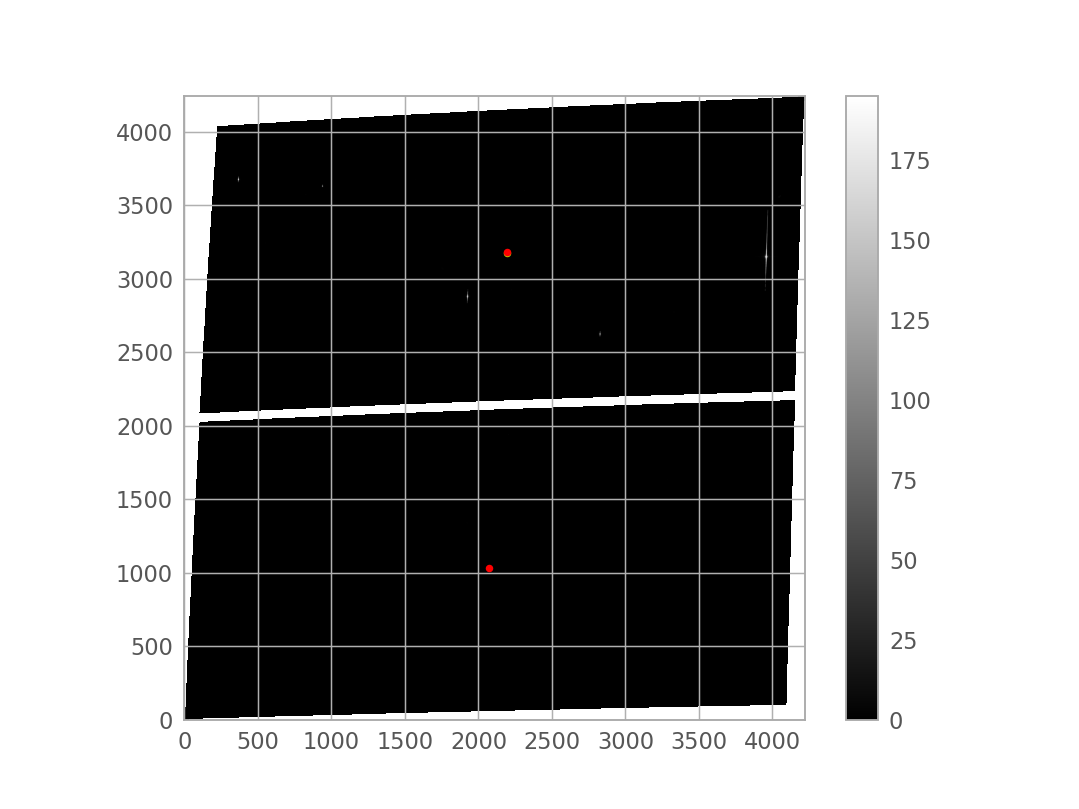

In [110]:
%matplotlib notebook
plt.figure()
plt.imshow(image_data, cmap='gray', origin='lower')
plt.plot(2073, 1035, '.', c='r') #co-ords from HDRTAB 
plt.plot(2194, 3178, '.', c='y') #co-ords Graeme
plt.plot(2193.1146514094908, 3179.373060472494, '.', c='r')
plt.colorbar()

(74, 74)


<IPython.core.display.Javascript object>


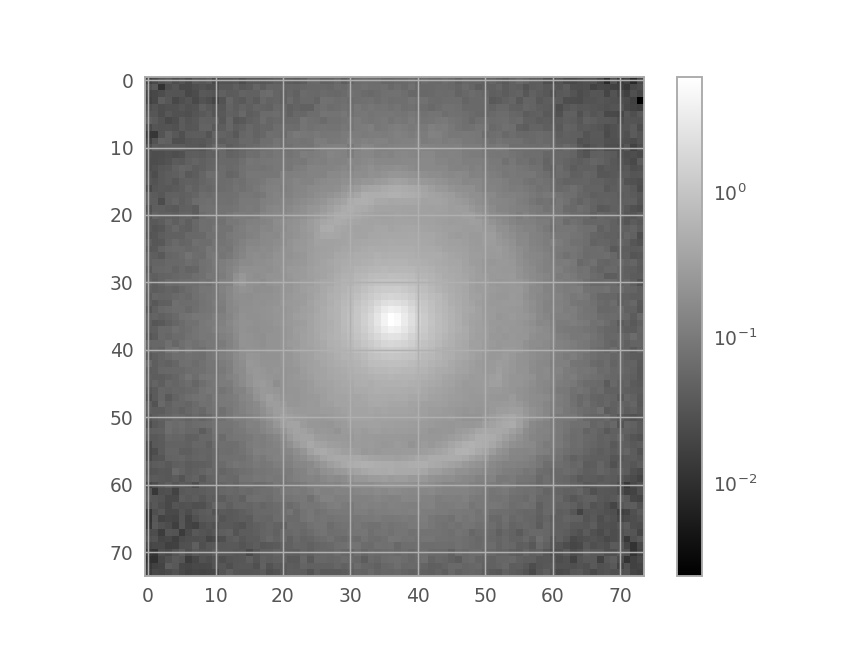

In [53]:
xcentre = int(np.round(2193.1146514094908))
ycentre = int(np.round(3179.373060472494))


x1 = xcentre-37
x2 = xcentre+37

y1 = ycentre-37
y2 = ycentre+37

#x1:x2, y1:y2 represents the pixel cropping coordinates

hdul = fits.open('MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits')

data = hdul[1].data

hdul[1].data= data[y1:y2,x1:x2]

data_c = data[y1:y2,x1:x2]
#Note that data_c is not used explicitly as data,
#   just to show visuals of the new data

print(data_c.shape)

plt.figure()
plt.imshow(data_c, cmap='gray', norm=LogNorm())
plt.colorbar()
plt.show()

In [52]:
int(np.round(2193.989))

2194

(74, 74)


<IPython.core.display.Javascript object>


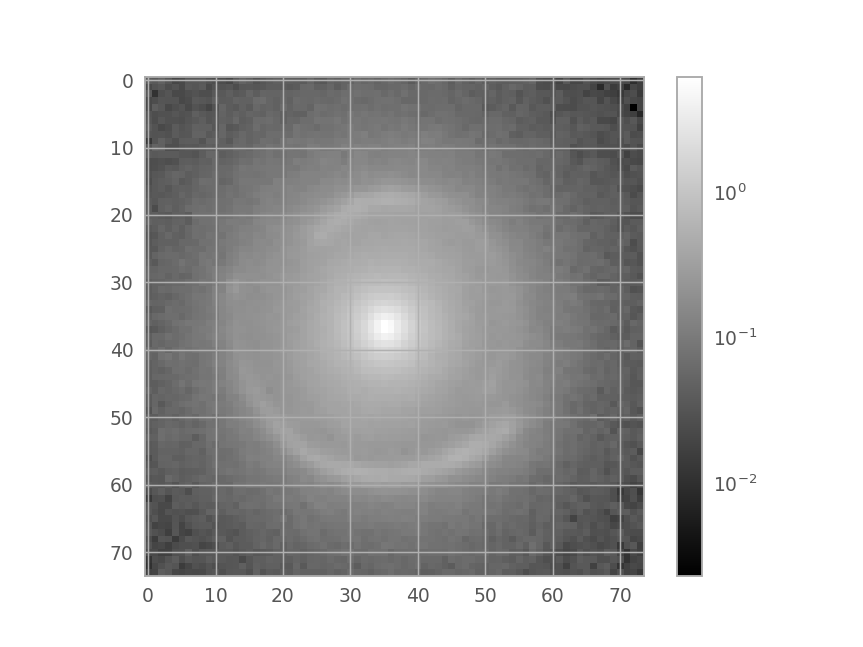

In [109]:
x1 = 2144+13
x2 = 2244-13

y1 = 3128+13
y2 = 3228-13

#x1:x2, y1:y2 represents the pixel cropping coordinates

hdul = fits.open('MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits')

data = hdul[1].data

hdul[1].data= data[y1:y2,x1:x2]

data_c = data[y1:y2,x1:x2]
#Note that data_c is not used explicitly as data,
#   just to show visuals of the new data

print(data_c.shape)

plt.figure()
plt.imshow(data_c, cmap='gray', norm=LogNorm())
plt.colorbar()
plt.show()

In [85]:
image_file = get_pkg_data_filename('../../galaxies_software/tinytim/SLACS100.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)

Filename: ..\..\galaxies_software\tinytim\SLACS100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   (74, 74)   float32   
(74, 74)


<IPython.core.display.Javascript object>


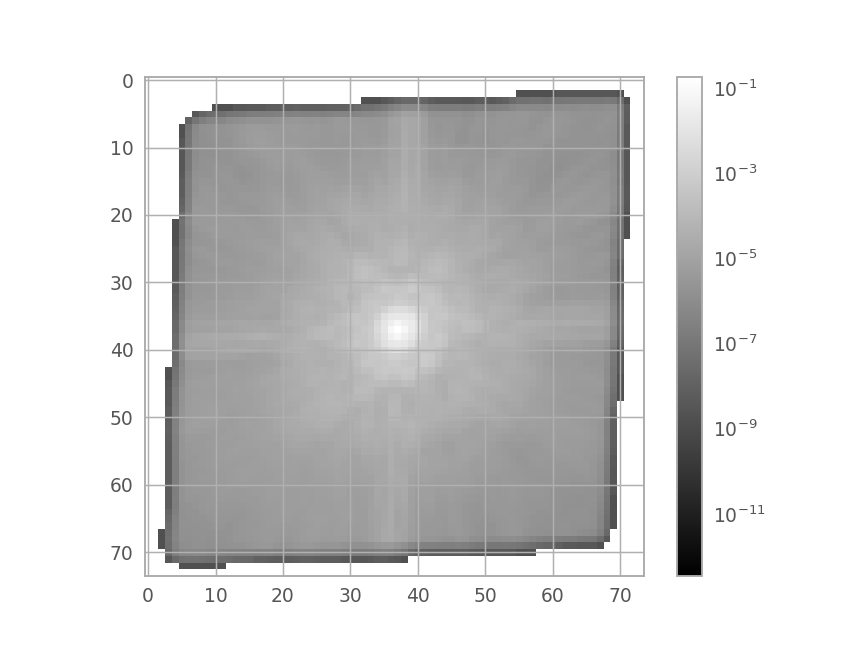

In [86]:
%matplotlib notebook
plt.figure()
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.colorbar()

In [157]:
con=convolve(data_c[0:73, 0:73].astype('float'), image_data[0:73, 0:73].astype('float'))

<IPython.core.display.Javascript object>


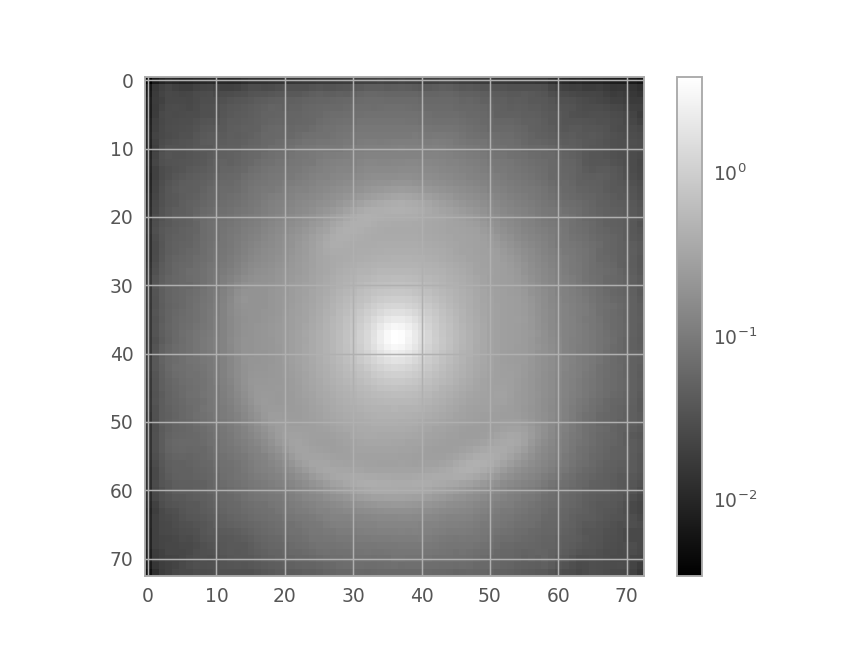

In [158]:
plt.figure()
plt.imshow(con, cmap='gray', norm=LogNorm())
plt.colorbar()

In [27]:
from astropy.io import fits
from astropy.wcs import WCS
 
with fits.open('MAST_2021-10-30T1757/MAST_2021-10-30T1757/HST/j9op04010/j9op04010_drc.fits') as hdu:
    wcs = WCS(fobj=hdu[1], header=hdu[1].header)

    
#Pixel position in (y, x)
pixel = (2194, 3178)
 
# Convert
ra, dec = wcs.all_pix2world(pixel[0], pixel[1], 1, ra_dec_order=True)
y, x = wcs.all_world2pix(ra, dec, 1, adaptive=False, ra_dec_order=True)
 
# Print results
print('Pixel ({}, {}) converts to RA: {}, Dec:{}'.format(y, x, ra, dec))

Pixel (2194.000000000058, 3178.0000000004284) converts to RA: 43.188390195117464, Dec:0.6662053693463923


In [67]:
y, x = wcs.all_world2pix(-167.38225, 5.396944444444445, 1, adaptive=False, ra_dec_order=True)
print(x, y)

nan nan


In [68]:
wcs.all_world2pix?

In [29]:
(2+(52/60)+(45.210/3600))*15

43.188375

In [73]:
def HMS2deg(ra='', dec=''):
    RA, DEC, rs, ds = '', '', 1, 1
    if dec:
        D, M, S = [float(i) for i in dec.split()]
        if str(D)[0] == '-':
            ds, D = -1, abs(D)
        deg = D + (M/60) + (S/3600)
        DEC = '{0}'.format(deg*ds)
            
    if ra:
        H, M, S = [float(i) for i in ra.split()]
        if str(H)[0] == '-':
            rs, H = -1, abs(H)
        deg = (H*15) + (M/4) + (S/240)
        RA = '{0}'.format(deg*rs)
        
    if ra and dec:
        return (float(RA), float(DEC))
    else:
        return float(RA) or float(DEC)

In [74]:
coords = HMS2deg(ra='2 52 45.210', dec='+0 39 58.36')

In [76]:
coords[0]

43.188375